## Word embedding

In [1]:
# import modules
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer 
import re, nltk, numpy, matplotlib
import pandas as pd
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer 
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora
from nltk.tokenize import sent_tokenize
from tqdm import tqdm
from datetime import datetime
import string
import gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\analo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\analo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\analo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv('C:/Users/analo/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/ASCoR-Project/Analysis/Descriptive-Stats/preprocessed.csv', encoding='latin-1')
df.head()  

,date,maintext,title,source,media_name,ideology,Congress,text
0,2015/02/13,Advertisement\r\r\nIn honor of our 95 annivers...,6 Ways the League of Women Voters Has Impacted...,http://www.huffingtonpost.com/elisabeth-macnam...,Huffington Post,left,114th,"honor 95 anniversary, list things americans pa..."
1,2015/02/10,"As state legislatures shift into high gear, ma...",Opportunities for Effective Election Reforms C...,http://www.huffingtonpost.com/robert-m-brandon...,Huffington Post,left,114th,"state legislatures shift high gear, election r..."
2,2015/02/22,"FILE - In a Tuesday, Nov. 4, 2014 file photo, ...","Scott Walker Pushes ALEC 'Right to Work' Bill,...",http://www.huffingtonpost.com/mary-bottari/sco...,Huffington Post,left,114th,"file - tuesday, nov. 4, 2014 file photo, wisco..."
3,2015/02/25,Former Ohio Gov. Ted Strickland (D) announced ...,Ted Strickland Announces He's Running For The ...,http://www.huffingtonpost.com/2015/02/25/ted-s...,Huffington Post,left,114th,ohio gov. ted strickland (d) announced wednesd...
4,2015/02/26,Nevada Senate Minority Leader Michael Roberson...,Nevada GOP Pushes New Gun Law Reminiscent Of '...,http://www.huffingtonpost.com/2015/02/26/nevad...,Huffington Post,left,114th,nevada senate minority leader michael roberson...


In [3]:
# creating two different datasets for media split by ideology
ideology = df.groupby("ideology")
left = ideology.get_group('left')
right = ideology.get_group('right')

In [4]:
list_right = right['text'].tolist()
list_left = left['text'].tolist()

In [5]:
# Right wing
trans_r = str.maketrans('', '', string.punctuation) # translation scheme for removing punctuation
uniquesentences_r = set()
for article in tqdm(list_right):
    for sentence in sent_tokenize(article):
        # remove HTML tags in there
        sentence = re.sub(r"<.*?>"," ",sentence)
        sentence = sentence.translate(trans_r) 
        if sentence not in uniquesentences_r:
            uniquesentences_r.add(sentence.lower())

print(f"We now have {len(uniquesentences_r)} unique sentences.")

100%|██████████| 1714/1714 [00:10<00:00, 167.30it/s]

We now have 64175 unique sentences.


In [6]:
# Left wing
trans_l = str.maketrans('', '', string.punctuation) # translation scheme for removing punctuation
uniquesentences_l = set()
for article in tqdm(list_left):
    for sentence in sent_tokenize(article):
        # remove HTML tags in there
        sentence = re.sub(r"<.*?>"," ",sentence)
        sentence = sentence.translate(trans_l) 
        if sentence not in uniquesentences_l:
            uniquesentences_l.add(sentence.lower())

print(f"We now have {len(uniquesentences_l)} unique sentences.")

100%|██████████| 2753/2753 [00:15<00:00, 177.70it/s]

We now have 128647 unique sentences.


In [7]:
corpus_r = list(right['text'])
corpus_l = list(left['text'])

In [ ]:
tfidf = TfidfVectorizer() 
tfidf.fit(corpus_r)
tfidf_features = tfidf.transform(corpus_r)


### Right wing media word embedding model

In [9]:
tokenizedsentences_r = (sentence.split() for sentence in uniquesentences_r)
tokenizedsentences2_r = (sentence.split() for sentence in uniquesentences_r)

In [10]:
model_r = gensim.models.Word2Vec(vector_size=300)
model_r.build_vocab(tokenizedsentences_r)
model_r.train(tokenizedsentences2_r, total_examples=model_r.corpus_count,  epochs=1)

2022-06-27 12:37:00,611 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=300, alpha=0.025)', 'datetime': '2022-06-27T12:37:00.611873', 'gensim': '4.1.2', 'python': '3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}
2022-06-27 12:37:00,613 : INFO : collecting all words and their counts
2022-06-27 12:37:00,615 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-06-27 12:37:00,725 : INFO : PROGRESS: at sentence #10000, processed 116312 words, keeping 15562 word types
2022-06-27 12:37:00,845 : INFO : PROGRESS: at sentence #20000, processed 231632 words, keeping 21196 word types
2022-06-27 12:37:01,030 : INFO : PROGRESS: at sentence #30000, processed 347307 words, keeping 25079 word types
2022-06-27 12:37:01,227 : INFO : PROGRESS: at sentence #40000, processed 462588 words, keeping 28341 word types
2022-06-27 12:37:01,412 : INFO : PROGRESS: at 

(669244, 744433)

In [15]:
# right wing id similarity
similar_to_id_r = model_r.wv.most_similar("identification",topn=20)
id_similar_r = pd.DataFrame(similar_to_id_r)
id_similar_r.columns=['word', 'similarity']
id_similar_r 

,word,similarity
0,voter,0.993205
1,laws,0.986966
2,photo,0.974931
3,requirements,0.973785
4,requiring,0.965370
5,absentee,0.964734
6,governmentissued,0.958279
7,fraud,0.957794
8,mandating,0.957713
9,sameday,0.955584


In [16]:
# Plotting words in a scatter plot
import pandas as pd
import matplotlib.pyplot as plt
def similarity(df, x_dim, y_dim):
  x = df[x_dim]
  y = df[y_dim]
  fig, ax = plt.subplots(figsize=(10, 10))
  #customizes alpha for each dot in the scatter plot
  ax.scatter(x, y, alpha=0.70, color='red')
 
  #adds a title and axes labels
  ax.set_title('Word Frequencies')
  ax.set_xlabel('Frequency')
  ax.set_ylabel('Word')
 
  #removing top and right borders
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  #adds major gridlines
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.show()

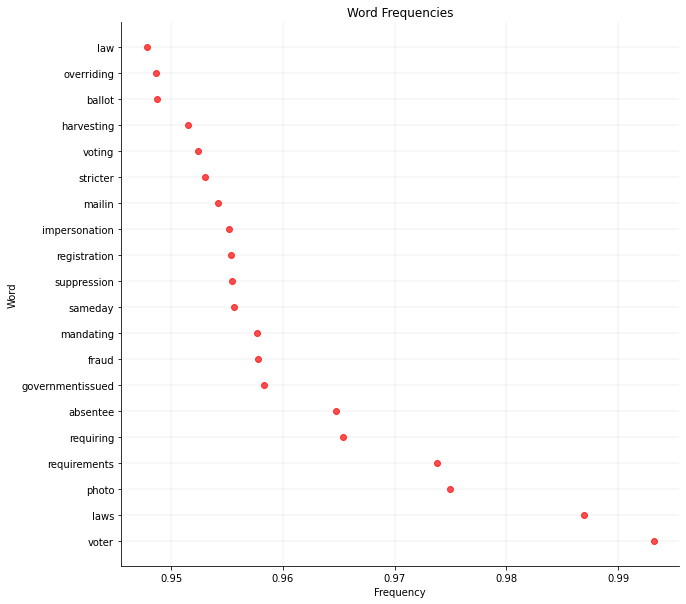

In [17]:
similarity(id_similar_r, 'similarity', 'word')

In [19]:
import multiprocessing

In [87]:
# Selecting keyword from right wing vocabulary of the pre-trained model and preparing word vectors for visualization.
keys = ['identification']
#'identification','election','democrat',
embedding_clusters_r = []
word_clusters_r = []
for word in keys:
    embeddings_r = []
    words_r = []
    for similar_word, _ in model_r.wv.most_similar(word, topn=60):
        words_r.append(similar_word)
        embeddings_r.append(model_r.wv[similar_word])
    embedding_clusters_r.append(embeddings_r)
    word_clusters_r.append(words_r)
    
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters_r = np.array(embedding_clusters_r)
n, m, k = embedding_clusters_r.shape
tsne_model_en_2d_r = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000, random_state=32)
embeddings_en_2d_r = np.array(tsne_model_en_2d_r.fit_transform(embedding_clusters_r.reshape(n * m, k))).reshape(n, m, 2)

C:\Users\analo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\analo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [90]:
# creating a 2D scatter plot using Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(10, 10))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color='blue',alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

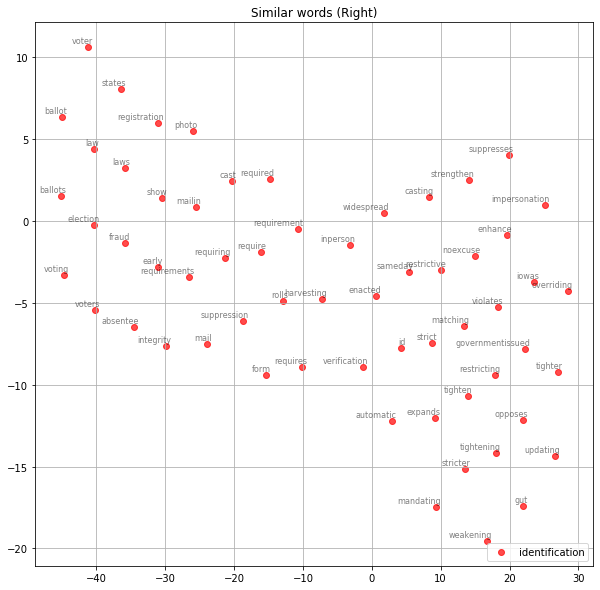

In [89]:
tsne_plot_similar_words('Similar words (Right)', keys, embeddings_en_2d_r, word_clusters_r, 0.7,
                        'similar_words.png')

### Left wing media word embedding model

In [12]:
tokenizedsentences_l = (sentence.split() for sentence in uniquesentences_l)
tokenizedsentences2_l = (sentence.split() for sentence in uniquesentences_l)

In [ ]:
model_l = gensim.models.Word2Vec(vector_size=300) # we want 300 dimensions
model_l.build_vocab(tokenizedsentences_l)
model_l.train(tokenizedsentences2_l, total_examples=model_l.corpus_count,  epochs=1)

In [ ]:
# left wing id similarity
similar_to_id_l = model_l.wv.most_similar("identification",topn=20)
id_similar_l = pd.DataFrame(similar_to_id_l)
id_similar_l.columns=['word', 'similarity']
id_similar_l

In [ ]:
model_l.wv.get_vector('identification')

In [91]:
# Selecting keyword from right wing vocabulary of the pre-trained model and preparing word vectors for visualization.
keys = ['identification']
#'identification','election','republican','suppression',
embedding_clusters_l = []
word_clusters_l = []
for word in keys:
    embeddings_l = []
    words_l = []
    for similar_word, _ in model_l.wv.most_similar(word, topn=60):
        words_l.append(similar_word)
        embeddings_l.append(model_l.wv[similar_word])
    embedding_clusters_l.append(embeddings_l)
    word_clusters_l.append(words_l)
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters_l = np.array(embedding_clusters_l)
n, m, k = embedding_clusters_l.shape
tsne_model_en_2d_l = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000, random_state=32)
embeddings_en_2d_l = np.array(tsne_model_en_2d_l.fit_transform(embedding_clusters_l.reshape(n * m, k))).reshape(n, m, 2)

C:\Users\analo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\analo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


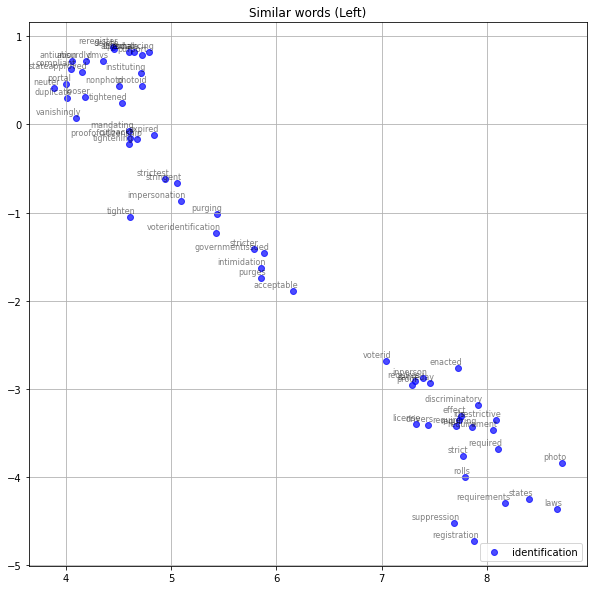

: 

In [92]:
tsne_plot_similar_words('Similar words (Left)', keys, embeddings_en_2d_l, word_clusters_l, 0.7,
                        'similar_words.png')